In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [89]:
Credit_Risk_DF = pd.read_csv("C:/Working Files/Mac ka folder/Simplilearn/Credit Risk/credit_risk_dataset.csv")

In [92]:
Credit_Risk_DF.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


# EDA Start from here.
1. We will study datatype, convert objects to numric
2. We will study Null and treatment
3. We will study basis statistical observations and outliers
4. We will study outcome impact on feature via histogram

In [93]:
Credit_Risk_DF.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

### 3 features and 1 Target are object type - needs to be into number using Encoder 

In [94]:
from sklearn.preprocessing import LabelEncoder
lencoder = LabelEncoder()

In [95]:
Credit_Risk_DF.person_home_ownership.value_counts()

RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: person_home_ownership, dtype: int64

In [96]:
Credit_Risk_DF.loan_intent.value_counts()

EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: loan_intent, dtype: int64

In [97]:
Credit_Risk_DF.loan_grade.value_counts()

A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: loan_grade, dtype: int64

In [98]:
Credit_Risk_DF.person_home_ownership = lencoder.fit_transform(Credit_Risk_DF.person_home_ownership)

In [99]:
Credit_Risk_DF.person_home_ownership.value_counts()

3    16446
0    13444
2     2584
1      107
Name: person_home_ownership, dtype: int64

#### Note
RENT        16446 >> 3 <br>
MORTGAGE    13444 >> 0 <br>
OWN          2584 >> 2 <br>
OTHER         107 >> 1 <br>

In [100]:
Credit_Risk_DF.loan_intent = lencoder.fit_transform(Credit_Risk_DF.loan_intent)

In [101]:
Credit_Risk_DF.loan_intent.value_counts()

1    6453
3    6071
5    5719
4    5521
0    5212
2    3605
Name: loan_intent, dtype: int64

#### Note
EDUCATION            6453 >> 1 <br>
MEDICAL              6071 >> 3 <br>
VENTURE              5719 >> 5 <br>
PERSONAL             5521 >> 4 <br>
DEBTCONSOLIDATION    5212 >> 0 <br>
HOMEIMPROVEMENT      3605 >> 2 <br>

In [102]:
Credit_Risk_DF.loan_grade = lencoder.fit_transform(Credit_Risk_DF.loan_grade)

In [103]:
Credit_Risk_DF.loan_grade.value_counts()

0    10777
1    10451
2     6458
3     3626
4      964
5      241
6       64
Name: loan_grade, dtype: int64

#### Note:
A    10777 >> 0 <br>
B    10451 >> 1 <br>
C     6458 >> 2 <br>
D     3626 >> 3 <br>
E      964 >> 4 <br>
F      241 >> 5 <br>
G       64 >> 6 <br>

In [104]:
Credit_Risk_DF.cb_person_default_on_file.value_counts()

N    26836
Y     5745
Name: cb_person_default_on_file, dtype: int64

In [105]:
Credit_Risk_DF.cb_person_default_on_file = lencoder.fit_transform(Credit_Risk_DF.cb_person_default_on_file)

In [106]:
Credit_Risk_DF.cb_person_default_on_file.value_counts()

0    26836
1     5745
Name: cb_person_default_on_file, dtype: int64

#### Note
N    26836 >> 0 (customer didn't default) <br>
Y     5745 >> 1 (customer defaulted)

In [107]:
Credit_Risk_DF.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

### Observations

1. We will remove NA with mean for both person_emp_length and loan_int_rate

In [108]:
Credit_Risk_DF.person_emp_length = Credit_Risk_DF.person_emp_length.fillna(Credit_Risk_DF.person_emp_length.mean())

In [109]:
Credit_Risk_DF.loan_int_rate = Credit_Risk_DF.loan_int_rate.fillna(Credit_Risk_DF.loan_int_rate.mean())

In [110]:
Credit_Risk_DF.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [111]:
Credit_Risk_DF.dtypes

person_age                      int64
person_income                   int64
person_home_ownership           int32
person_emp_length             float64
loan_intent                     int32
loan_grade                      int32
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file       int32
cb_person_cred_hist_length      int64
dtype: object

In [112]:
round(Credit_Risk_DF.describe(),2)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
count,32581.00,32581.00,32581.00,32581.00,32581.00,32581.00,32581.00,32581.00,32581.00,32581.00,32581.00,32581.00
mean,27.73,66074.85,1.68,4.79,2.53,1.22,9589.37,11.01,0.22,0.17,0.18,5.80
std,6.35,61983.12,1.43,4.09,1.73,1.17,6322.09,3.08,0.41,0.11,0.38,4.06
min,20.00,4000.00,0.00,0.00,0.00,0.00,500.00,5.42,0.00,0.00,0.00,2.00
25%,23.00,38500.00,0.00,2.00,1.00,0.00,5000.00,8.49,0.00,0.09,0.00,3.00
50%,26.00,55000.00,3.00,4.00,3.00,1.00,8000.00,11.01,0.00,0.15,0.00,4.00
75%,30.00,79200.00,3.00,7.00,4.00,2.00,12200.00,13.11,0.00,0.23,0.00,8.00
max,144.00,6000000.00,3.00,123.00,5.00,6.00,35000.00,23.22,1.00,0.83,1.00,30.00


### Observations <br>
1. High deviations observed in Person Income, rest features do have deviation but less significant. <br>
2. Person Income could be considered for outlier treatment. <br>
3. We will drop Person Income >= 6000000 <br>
4. We will analyze it with Box-Polt

<AxesSubplot:xlabel='person_income'>

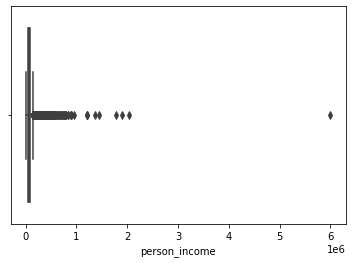

In [113]:
sns.boxplot(Credit_Risk_DF.person_income)

In [114]:
Credit_Risk_DF[Credit_Risk_DF.person_income >= 6000000.00]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32297,144,6000000,0,12.0,4,2,5000,12.73,0,0.0,0,25


In [115]:
Credit_Risk_DF.drop(labels=[32297],axis=0,inplace=True)

In [116]:
Credit_Risk_DF[Credit_Risk_DF.person_income >= 6000000.00]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length


In [117]:
round(Credit_Risk_DF.describe(),2)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
count,32580.00,32580.00,32580.00,32580.00,32580.00,32580.00,32580.00,32580.00,32580.00,32580.00,32580.00,32580.00
mean,27.73,65892.71,1.68,4.79,2.53,1.22,9589.51,11.01,0.22,0.17,0.18,5.80
std,6.32,52547.02,1.43,4.09,1.73,1.17,6322.13,3.08,0.41,0.11,0.38,4.05
min,20.00,4000.00,0.00,0.00,0.00,0.00,500.00,5.42,0.00,0.00,0.00,2.00
25%,23.00,38500.00,0.00,2.00,1.00,0.00,5000.00,8.49,0.00,0.09,0.00,3.00
50%,26.00,55000.00,3.00,4.00,3.00,1.00,8000.00,11.01,0.00,0.15,0.00,4.00
75%,30.00,79200.00,3.00,7.00,4.00,2.00,12200.00,13.11,0.00,0.23,0.00,8.00
max,144.00,2039784.00,3.00,123.00,5.00,6.00,35000.00,23.22,1.00,0.83,1.00,30.00


In [118]:
Credit_Risk_DF.shape

(32580, 12)

In [119]:
Credit_Risk_DF.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

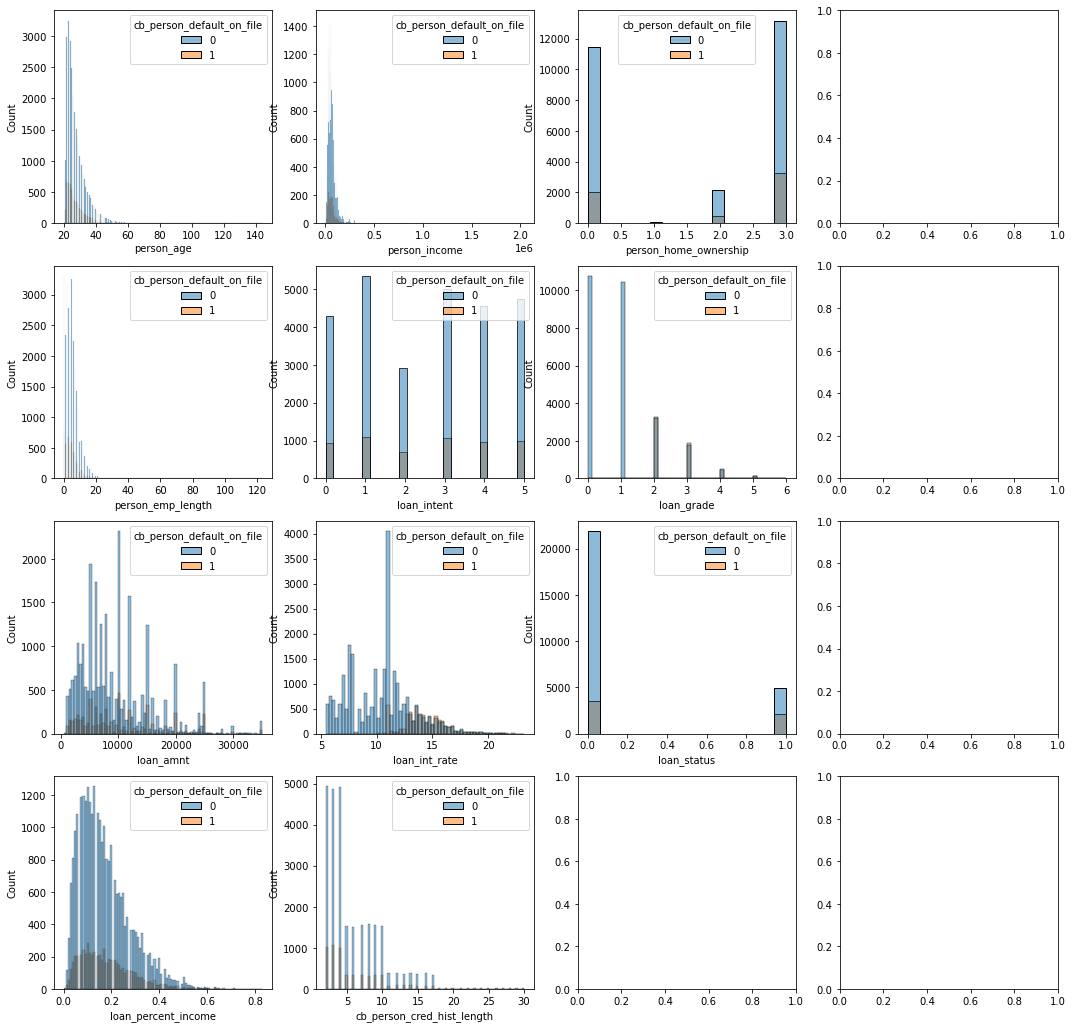

In [120]:
fig,axs = plt.subplots(nrows=4,ncols=4,figsize=(18,18))
sf_cols = ['person_age', 'person_income', 'person_home_ownership','person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_cred_hist_length']
for i in range(0,len(sf_cols)):
    rows = i//3
    cols =i%3
    ax = axs[rows,cols]
    plot = sns.histplot (x=sf_cols[i],  data=Credit_Risk_DF,ax=ax,color="aqua", hue='cb_person_default_on_file')

### Observations <br>
1. Person age less 30 years are on high default list. <br>
2. Person home on Rent and Mortgage are on high default list. <br>
3. Person loan grade 2 to 6 are default list. <br>
4. Loan interest rate with 8% to 16% has high defaulters.
5. Person income, employee lengh, loan intent, amount, status, loan pertcentage income and credit history may not have significant impact on person default or not. <br>

# Relationship Study and Train-Test Split

In [121]:
round(Credit_Risk_DF.corr(),2)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
person_age,1.00,0.14,-0.03,0.16,0.04,0.01,0.05,0.01,-0.02,-0.04,0.01,0.86
person_income,0.14,1.00,-0.24,0.15,-0.00,-0.00,0.32,-0.00,-0.17,-0.29,-0.00,0.12
person_home_ownership,-0.03,-0.24,1.00,-0.23,0.01,0.12,-0.13,0.13,0.21,0.14,0.06,-0.03
person_emp_length,0.16,0.15,-0.23,1.00,0.02,-0.05,0.11,-0.05,-0.08,-0.05,-0.03,0.14
loan_intent,0.04,-0.00,0.01,0.02,1.00,-0.01,-0.00,-0.00,-0.07,0.00,-0.00,0.04
loan_grade,0.01,-0.00,0.12,-0.05,-0.01,1.00,0.15,0.89,0.37,0.12,0.54,0.01
loan_amnt,0.05,0.32,-0.13,0.11,-0.00,0.15,1.00,0.14,0.11,0.57,0.04,0.04
loan_int_rate,0.01,-0.00,0.13,-0.05,-0.00,0.89,0.14,1.00,0.32,0.11,0.48,0.02
loan_status,-0.02,-0.17,0.21,-0.08,-0.07,0.37,0.11,0.32,1.00,0.38,0.18,-0.02
loan_percent_income,-0.04,-0.29,0.14,-0.05,0.00,0.12,0.57,0.11,0.38,1.00,0.04,-0.03


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0.5, 0, 'person_age'),
  Text(1.5, 0, 'person_income'),
  Text(2.5, 0, 'person_home_ownership'),
  Text(3.5, 0, 'person_emp_length'),
  Text(4.5, 0, 'loan_intent'),
  Text(5.5, 0, 'loan_grade'),
  Text(6.5, 0, 'loan_amnt'),
  Text(7.5, 0, 'loan_int_rate'),
  Text(8.5, 0, 'loan_status'),
  Text(9.5, 0, 'loan_percent_income'),
  Text(10.5, 0, 'cb_person_default_on_file'),
  Text(11.5, 0, 'cb_person_cred_hist_length')])

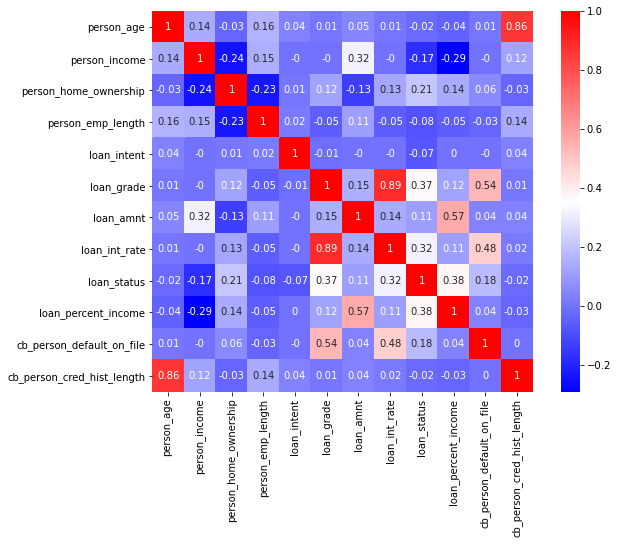

In [122]:
plt.figure(figsize=(10,7))
sns.heatmap(data=round(Credit_Risk_DF.corr(),2),square=True,cmap="bwr",annot=True)
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)

In [123]:
Features = Credit_Risk_DF[['person_age', 'person_income', 'person_home_ownership','person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_cred_hist_length']]

In [124]:
Target = Credit_Risk_DF[['cb_person_default_on_file']]

### Observations <br>
1. Majority of features don't have any relationship with Target, loan interest percentage. <br>
2. Few features has strong relationship: <br>
   2.2 Loan percentage income with loan amount. <br> 
   2.3 Person age with person credit history <br>
3. Although will not drop above features

# Model Building and Selection
1. Analyze multiple Classifier Models like LogisticRegression, RandomForestClassifier and KNeighborsClassifier <br>
2. Model will be assessed using metrics like score, precision, recall, f1-score

In [125]:
X_train, X_test, Y_train, Y_test = train_test_split(Features, Target, test_size = 0.25 , random_state = 20)

In [131]:
from sklearn.linear_model import LogisticRegression 
LogR = LogisticRegression()
from sklearn.metrics import classification_report,auc,roc_curve,roc_auc_score,confusion_matrix
LogR.fit(X_train,Y_train)
pred = LogR.predict(X_test)
print("Training score is ",LogR.score(X_train,Y_train))
print("Testing score is ",LogR.score(X_test,Y_test))
fpr_LogR,tpr_LogR,thresholds_LogR = roc_curve(Y_test,pred, pos_label=1)
print("AUC Score with LogisticRegression ",roc_auc_score(Y_test,pred))

Training score is  0.8252915899324739
Testing score is  0.8165745856353591
AUC Score with LogisticRegression  0.5949197540095302


In [132]:
print("Classification report for LogisticRegression")
print("============================================")
print(classification_report(Target,LogR.predict(Features)))

Classification report for LogisticRegression
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     26835
           1       0.50      0.26      0.34      5745

    accuracy                           0.82     32580
   macro avg       0.68      0.60      0.62     32580
weighted avg       0.79      0.82      0.80     32580



In [133]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(X_train,Y_train)
pred = RFC.predict(X_test)
print("Training score is ",RFC.score(X_train,Y_train))
print("Testing score is ",RFC.score(X_test,Y_test))
fpr_RFC,tpr_RFC,thresholds_RFC = roc_curve(Y_test,pred, pos_label=1)
print("AUC Score with RandomForestClassifier ",roc_auc_score(Y_test,pred))

Training score is  0.9991815019439328
Testing score is  0.8279926335174954
AUC Score with RandomForestClassifier  0.7086026508039369


In [135]:
print("Classification report for RandomForestClassifier")
print("================================================")
print(classification_report(Target,RFC.predict(Features)))

Classification report for RandomForestClassifier
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     26835
           1       0.88      0.88      0.88      5745

    accuracy                           0.96     32580
   macro avg       0.92      0.93      0.92     32580
weighted avg       0.96      0.96      0.96     32580



In [136]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train,Y_train)
pred = neigh.predict(X_test)
print("Training score is ",neigh.score(X_train,Y_train))
print("Testing score is ",neigh.score(X_test,Y_test))
fpr_neigh,tpr_neigh,thresholds_neigh = roc_curve(Y_test,pred, pos_label=1)
print("AUC Score with KNeighborsClassifier ",roc_auc_score(Y_test,pred))

Training score is  0.8727235522815633
Testing score is  0.7834254143646409
AUC Score with KNeighborsClassifier  0.5398700629745942


In [138]:
print("Classification report for KNeighborsClassifier")
print("==============================================")
print(classification_report(Target,neigh.predict(Features)))

Classification report for KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     26835
           1       0.63      0.36      0.46      5745

    accuracy                           0.85     32580
   macro avg       0.75      0.66      0.69     32580
weighted avg       0.83      0.85      0.83     32580



### Observations
1. F1 score for both default and non-deafult is best covered by RandomForestClassifier <br>
2. RandomForestClassifier <br>
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     26835
           1       0.88      0.88      0.88      5745
3. LogisticRegression <br>
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     26835
           1       0.50      0.26      0.34      5745

4. KNeighborsClassifier <br>
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     26835
           1       0.63      0.36      0.46      5745

### We will select RandomForestClassifier

# Refine selected model using hyperparameters and GridSearchCV
1. Selected model RandomForestClassifier <br>
2. Analyze parameters bootstrap, max_depth, max_features, min_samples_leaf, min_samples_split and n_estimators <br>
2. Grid Search with Cross Validation <br>

In [139]:
from pprint import pprint

In [140]:
print('Parameters currently in use:\n')
pprint(RFC.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


#### We will try adjusting the following set of hyperparameters:
n_estimators = number of trees in the foreset <br>
max_features = max number of features considered for splitting a node <br>
max_depth = max number of levels in each decision tree <br>
min_samples_split = min number of data points placed in a node before the node is split <br>
min_samples_leaf = min number of data points allowed in a leaf node <br>
bootstrap = method for sampling data points (with or without replacement) <br>

In [159]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1100, num = 10)]
max_features = ['auto', 'sqrt']
## max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5]
min_samples_leaf = [1, 2]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
#               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2],
 'min_samples_split': [2, 5],
 'n_estimators': [200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100]}


In [160]:
rf_random = GridSearchCV(RFC, random_grid, cv = 5, verbose=2, scoring='accuracy', refit=True)
# Fit the random search model

In [161]:
rf_random.fit(X_train,Y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.5s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.1s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.1s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.0s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.6s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   6.1s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   6.1s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=2

[CV] END bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=  13.4s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=  14.2s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=  13.6s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=  16.4s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=  15.8s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=  16.0s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=  15.6s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=  17.4s
[CV] END bootstrap=True,

[CV] END bootstrap=True, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=900; total time=  26.6s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=900; total time=  24.1s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=900; total time=  28.8s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=900; total time=  23.8s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=900; total time=  24.1s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=  26.9s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=  25.8s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=  25.4s
[CV] END bootstrap=Tr

[CV] END bootstrap=True, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   5.2s
[CV] END bootstrap=True, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   5.4s
[CV] END bootstrap=True, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   5.4s
[CV] END bootstrap=True, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   8.3s
[CV] END bootstrap=True, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   8.7s
[CV] END bootstrap=True, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   8.5s
[CV] END bootstrap=True, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   8.6s
[CV] END bootstrap=True, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   9.5s
[CV] END bootstrap=True,

[CV] END bootstrap=True, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=  15.3s
[CV] END bootstrap=True, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=  15.0s
[CV] END bootstrap=True, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=  15.0s
[CV] END bootstrap=True, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=  14.9s
[CV] END bootstrap=True, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=  15.3s
[CV] END bootstrap=True, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=700; total time=  18.2s
[CV] END bootstrap=True, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=700; total time=  17.6s
[CV] END bootstrap=True, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=700; total time=  17.8s
[CV] END bootstrap=True,

[CV] END bootstrap=True, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=900; total time=  25.1s
[CV] END bootstrap=True, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=900; total time=  23.0s
[CV] END bootstrap=True, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=  25.4s
[CV] END bootstrap=True, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=  25.6s
[CV] END bootstrap=True, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=  25.3s
[CV] END bootstrap=True, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=  25.4s
[CV] END bootstrap=True, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=  25.5s
[CV] END bootstrap=True, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1100; total time=  27.9s
[CV] END bootstrap

[CV] END bootstrap=False, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   9.2s
[CV] END bootstrap=False, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   9.6s
[CV] END bootstrap=False, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   9.1s
[CV] END bootstrap=False, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   9.2s
[CV] END bootstrap=False, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   9.7s
[CV] END bootstrap=False, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=  16.3s
[CV] END bootstrap=False, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=  14.6s
[CV] END bootstrap=False, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=  14.8s
[CV] END bootstr

[CV] END bootstrap=False, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=  23.5s
[CV] END bootstrap=False, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=  22.2s
[CV] END bootstrap=False, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=  23.2s
[CV] END bootstrap=False, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=700; total time=  27.3s
[CV] END bootstrap=False, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=700; total time=  25.9s
[CV] END bootstrap=False, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=700; total time=  26.3s
[CV] END bootstrap=False, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=700; total time=  25.9s
[CV] END bootstrap=False, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=700; total time=  27.5s
[CV] END bootstr

[CV] END bootstrap=False, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=900; total time=  36.8s
[CV] END bootstrap=False, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=  39.8s
[CV] END bootstrap=False, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=  39.5s
[CV] END bootstrap=False, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=  41.3s
[CV] END bootstrap=False, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=  37.7s
[CV] END bootstrap=False, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=  38.5s
[CV] END bootstrap=False, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1100; total time=  40.0s
[CV] END bootstrap=False, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1100; total time=  41.5s
[CV] END 

[CV] END bootstrap=False, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  13.1s
[CV] END bootstrap=False, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  15.7s
[CV] END bootstrap=False, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  14.3s
[CV] END bootstrap=False, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  13.0s
[CV] END bootstrap=False, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=  18.0s
[CV] END bootstrap=False, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=  14.9s
[CV] END bootstrap=False, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=  15.1s
[CV] END bootstrap=False, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=  14.8s
[CV] END bootstr

[CV] END bootstrap=False, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=  21.4s
[CV] END bootstrap=False, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=  22.0s
[CV] END bootstrap=False, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=700; total time=  25.7s
[CV] END bootstrap=False, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=700; total time=  25.6s
[CV] END bootstrap=False, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=700; total time=  25.5s
[CV] END bootstrap=False, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=700; total time=  25.2s
[CV] END bootstrap=False, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=700; total time=  25.7s
[CV] END bootstrap=False, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=  29.3s
[CV] END bootstr

[CV] END bootstrap=False, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=  36.4s
[CV] END bootstrap=False, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=  35.5s
[CV] END bootstrap=False, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=  36.2s
[CV] END bootstrap=False, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=  36.1s
[CV] END bootstrap=False, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=  37.0s
[CV] END bootstrap=False, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1100; total time=  40.6s
[CV] END bootstrap=False, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1100; total time=  39.4s
[CV] END bootstrap=False, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1100; total time=  39.7s
[CV] END

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [200, 300, 400, 500, 600, 700, 800,
                                          900, 1000, 1100]},
             scoring='accuracy', verbose=2)

In [163]:
rf_random.best_params_

{'bootstrap': False,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 700}

In [164]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=False, max_features='sqrt', n_estimators=700)

In [165]:
predictions_rf_random = rf_random.predict(X_test)

In [166]:
print("Training score is ",rf_random.score(X_train,Y_train))
print("Testing score is ",rf_random.score(X_test,Y_test))
fpr_RFC,tpr_RFC,thresholds_RFC = roc_curve(Y_test,predictions_rf_random, pos_label=1)
print("AUC Score with RandomForestClassifier ",roc_auc_score(Y_test,predictions_rf_random))

Training score is  0.9991815019439328
Testing score is  0.8282381829343155
AUC Score with RandomForestClassifier  0.7189424108321472


In [167]:
print("Classification report for RandomForestClassifier")
print("================================================")
print(classification_report(Target,rf_random.predict(Features)))

Classification report for RandomForestClassifier
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     26835
           1       0.87      0.88      0.88      5745

    accuracy                           0.96     32580
   macro avg       0.92      0.93      0.93     32580
weighted avg       0.96      0.96      0.96     32580

